<a href="https://colab.research.google.com/github/mmalik17/Sales-Analysis/blob/main/Basic_ecommerce_purchase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# DATA UNDERSTANDING

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/mmalik17/Sales-Analysis/main/Ecommerce%20Purchases.csv')

In [4]:
data.head() #look at data sample

#the purpose is to idemtify the data grain of the table. from the table below, it is concluded that every row represent one transaction.

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Address           10000 non-null  object 
 1   Lot               10000 non-null  object 
 2   AM or PM          10000 non-null  object 
 3   Browser Info      10000 non-null  object 
 4   Company           10000 non-null  object 
 5   Credit Card       10000 non-null  int64  
 6   CC Exp Date       10000 non-null  object 
 7   CC Security Code  10000 non-null  int64  
 8   CC Provider       10000 non-null  object 
 9   Email             10000 non-null  object 
 10  Job               10000 non-null  object 
 11  IP Address        10000 non-null  object 
 12  Language          10000 non-null  object 
 13  Purchase Price    10000 non-null  float64
dtypes: float64(1), int64(2), object(11)
memory usage: 1.1+ MB


from data.info(), I assumed that there are only two variables that may influence the purchase price, which are Address and Job. Address has a relation to region while job has a relation with economic. Hence, for further analysis, I'll only kept Address, Job, and Purchase Price column

In [6]:
data.shape

(10000, 14)

In [7]:
data.describe()

,Credit Card,CC Security Code,Purchase Price
count,1.000000e+04,10000.000000,10000.000000
mean,2.341374e+15,907.217800,50.347302
std,2.256103e+15,1589.693035,29.015836
min,6.040186e+10,0.000000,0.000000
25%,3.056322e+13,280.000000,25.150000
50%,8.699942e+14,548.000000,50.505000
75%,4.492298e+15,816.000000,75.770000
max,6.012000e+15,9993.000000,99.990000


#DATA CLEANING AND PREPARATION

In [8]:
selected_data = data[['Address','Job','Purchase Price']]
selected_data

,Address,Job,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...","Scientist, product/process development",98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",Drilling engineer,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,Customer service manager,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798",Drilling engineer,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",Fine artist,77.82
...,...,...,...
9995,"966 Castaneda Locks\nWest Juliafurt, CO 96415",Printmaker,82.21
9996,"832 Curtis Dam Suite 785\nNorth Edwardburgh, T...",Energy engineer,25.63
9997,Unit 4434 Box 6343\nDPO AE 28026-0283,Veterinary surgeon,83.98
9998,"0096 English Rest\nRoystad, IA 12457",Local government officer,38.84


In [9]:
#Check the data type
selected_data.dtypes

Address            object
Job                object
Purchase Price    float64
dtype: object

In [10]:
#check missing values
selected_data.isnull().sum()

Address           0
Job               0
Purchase Price    0
dtype: int64

In [11]:
#check duplicated data
data.duplicated().sum()

0

In [12]:
#There is no cleaning data needed because there is no missing and duplicated data. The data type is also suitable

##Analyze relationship between region  variable to purchase Price variable

In [13]:
selected_data.columns

Index(['Address', 'Job', 'Purchase Price'], dtype='object')

The column that close to region variable is Address, so we need to extract address column to state column and city column

In [14]:
selected_data[['Address']]

,Address
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77..."
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8..."
2,Unit 0065 Box 5052\nDPO AP 27450
3,"7780 Julia Fords\nNew Stacy, WA 45798"
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5..."
...,...
9995,"966 Castaneda Locks\nWest Juliafurt, CO 96415"
9996,"832 Curtis Dam Suite 785\nNorth Edwardburgh, T..."
9997,Unit 4434 Box 6343\nDPO AE 28026-0283
9998,"0096 English Rest\nRoystad, IA 12457"


In [15]:
selected_data['Address'] = selected_data['Address'].str.replace('\n', ',')
selected_data[['Address']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Address
0,"16629 Pace Camp Apt. 448,Alexisborough, NE 771..."
1,"9374 Jasmine Spurs Suite 508,South John, TN 84..."
2,"Unit 0065 Box 5052,DPO AP 27450"
3,"7780 Julia Fords,New Stacy, WA 45798"
4,"23012 Munoz Drive Suite 337,New Cynthia, TX 57826"
...,...
9995,"966 Castaneda Locks,West Juliafurt, CO 96415"
9996,"832 Curtis Dam Suite 785,North Edwardburgh, TX..."
9997,"Unit 4434 Box 6343,DPO AE 28026-0283"
9998,"0096 English Rest,Roystad, IA 12457"


In [16]:
#split address data to city and state
region = selected_data['Address'].str.split(",", expand=True)
selected_data['City'] = region[1]
selected_data['State'] = region[2].str[1:3]
selected_data['Postcode'] = region[2].str[4:]

selected_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,Address,Job,Purchase Price,City,State,Postcode
0,"16629 Pace Camp Apt. 448,Alexisborough, NE 771...","Scientist, product/process development",98.14,Alexisborough,NE,77130-7478
1,"9374 Jasmine Spurs Suite 508,South John, TN 84...",Drilling engineer,70.73,South John,TN,84355-4179
2,"Unit 0065 Box 5052,DPO AP 27450",Customer service manager,0.95,DPO AP 27450,None,None
3,"7780 Julia Fords,New Stacy, WA 45798",Drilling engineer,78.04,New Stacy,WA,45798
4,"23012 Munoz Drive Suite 337,New Cynthia, TX 57826",Fine artist,77.82,New Cynthia,TX,57826
...,...,...,...,...,...,...
9995,"966 Castaneda Locks,West Juliafurt, CO 96415",Printmaker,82.21,West Juliafurt,CO,96415
9996,"832 Curtis Dam Suite 785,North Edwardburgh, TX...",Energy engineer,25.63,North Edwardburgh,TX,55158
9997,"Unit 4434 Box 6343,DPO AE 28026-0283",Veterinary surgeon,83.98,DPO AE 28026-0283,None,None
9998,"0096 English Rest,Roystad, IA 12457",Local government officer,38.84,Roystad,IA,12457


Notice that in column 3, the city is named as 'DPO AP 27450' which is not a city name. DPO is abbreviation of Diplomatic Post Office, while the character behind 'DPO' is state code and postcode

Hence, if there is 'DPO' in City coulmn, the character after DPO should be placed to state and postcode.

In [17]:
df = selected_data

Before modify 'DPO' city type, I want to check is there any abnormal city type besides 'DPO'

In [21]:
df['City'].unique().tolist()

['Alexisborough',
 'South John',
 'DPO AP 27450',
 'New Stacy',
 'New Cynthia',
 'Travisland',
 'Andersonburgh',
 'Castroberg',
 'New Michelle',
 'Lake Tinafort',
 'Lake Maria',
 'Thomasview',
 'Boltonport',
 'Alexanderbury',
 'East Scottborough',
 'Blakemouth',
 'East Brittney',
 'Port Kimberly',
 'West Michaelchester',
 'Boothton',
 'Lake Jamesview',
 'Wilkinsonbury',
 'Shortmouth',
 'Russellmouth',
 'DPO AE 61496-4172',
 'Aaronhaven',
 'North Kirsten',
 'South Ashley',
 'North Jonathanberg',
 'West Susanton',
 'Snowchester',
 'FPO AA 27052-1231',
 'DPO AE 72362',
 'Louischester',
 'New Yvonnefurt',
 'Laurabury',
 'Christopherfort',
 'Carloshaven',
 'Port Davidtown',
 'Berrybury',
 'North Nicole',
 'Anthonyside',
 'Sarafort',
 'Lake Brianahaven',
 'Juliefurt',
 'Perkinsberg',
 'Port Susan',
 'Maldonadoshire',
 'Lake Sarahfort',
 'Franklinside',
 'Adamsfort',
 'Ryanfurt',
 'North Josephberg',
 ' Box 7059',
 'Weaverbury',
 'Sandraview',
 'North Hannahfurt',
 'North Rebecca',
 'Nataliel

Notice that there are three city name type that seems abnormal, which are 'DPO...', 'APO....', and ' Box...'. Those types of address need to be fixed in data preparation phase

In [57]:
df[df['City'].str[0:3]=='DPO'].head()

,Address,Job,Purchase Price,City,State,Postcode
2,"Unit 0065 Box 5052,DPO AP 27450",Customer service manager,0.95,DPO AP 27450,None,None
24,"Unit 3046 Box 3197,DPO AE 61496-4172",Musician,85.31,DPO AE 61496-4172,None,None
32,"Unit 3628 Box 6778,DPO AE 72362",Civil Service fast streamer,56.63,DPO AE 72362,None,None
70,"Unit 9635 Box 0238,DPO AE 55910-7730",Forensic scientist,78.91,DPO AE 55910-7730,None,None
92,"Unit 9659 Box 0618,DPO AA 00377-5360","Engineer, land",73.41,DPO AA 00377-5360,None,None


In [27]:
df[df['City'].str[0:3]=='FPO'].head()

,Address,Job,Purchase Price,City,State,Postcode
31,"USNS Alvarado,FPO AA 27052-1231",Sales executive,94.14,FPO AA 27052-1231,None,None
125,"USNV Donaldson,FPO AA 63819-3906","Merchandiser, retail",36.28,FPO AA 63819-3906,None,None
133,"USNS Hoffman,FPO AP 33357",Magazine features editor,82.45,FPO AP 33357,None,None
143,"USS Berry,FPO AP 42778-1290","Scientist, marine",86.43,FPO AP 42778-1290,None,None
164,"USNS Cobb,FPO AE 92579",Television/film/video producer,81.21,FPO AE 92579,None,None


In [25]:
df[df['City'].str[0:4]==' Box'].head()

,Address,Job,Purchase Price,City,State,Postcode
53,"PSC 9431, Box 7059,APO AA 29285-1363",Technical author,10.41,Box 7059,PO,AA 29285-1363
75,"PSC 6723, Box 3476,APO AP 56767-0500",Purchasing manager,87.81,Box 3476,PO,AP 56767-0500
127,"PSC 3209, Box 6106,APO AE 45267",Armed forces operational officer,63.31,Box 6106,PO,AE 45267
130,"PSC 0514, Box 6842,APO AE 37889-7946",Tourism officer,43.13,Box 6842,PO,AE 37889-7946
159,"PSC 1717, Box 9046,APO AP 75015-9066",Research scientist (life sciences),81.25,Box 9046,PO,AP 75015-9066


If the city column contains word 'DPO' or 'APO' in the first three character, <br> 
  then the 'City' column should be typed as unknown, <br> 
  the 'State' column should be filled with character from 'City' column character 5 and 6. <br>
  the 'Postcode' column should be filled with character from 'City' column character 8 to the end.

If the city column contains word ' Box' in the second - fourth character, <br>
  then the City 'column' should be filled as unknown, <br>
  the State column should be filled with character from 'Postcode' column character 1 to 2 (region[3].str[0:2]). <br>
  the Postcode column should be filled with character from Postcode 'column' character 4 to the end.

Else, no change in column content

In [45]:
#make a new dataframe only so we don't  remove content from original dataframe
new_df = df[['Address']]
new_df.head(3)

,Address
0,"16629 Pace Camp Apt. 448,Alexisborough, NE 771..."
1,"9374 Jasmine Spurs Suite 508,South John, TN 84..."
2,"Unit 0065 Box 5052,DPO AP 27450"


In [69]:
#modify the City, State, and Postcode column
conditions = [
           df['City'].str[0:3]=='DPO',
           df['City'].str[0:3]=='FPO',   
           df['City'].str[1:4]=='Box',
]
city_change = ['Unknown (DPO)','Unknown (FPO)','Unknown (APO)']
state_change = [df['City'].str[4:6],df['City'].str[4:6],df['Postcode'].str[0:2]]
postcode_change = [df['City'].str[7:],df['City'].str[7:],df['Postcode'].str[3:]]
new_df['City'] = np.select(conditions, city_change, default=df['City'])
new_df['State'] = np.select(conditions, state_change, default=df['State'])
new_df['Postcode'] = np.select(conditions, postcode_change, default=df['Postcode'])
new_df

,Address,City,State,Postcode,Job,Purchase Price
0,"16629 Pace Camp Apt. 448,Alexisborough, NE 771...",Alexisborough,NE,77130-7478,"Scientist, product/process development",98.14
1,"9374 Jasmine Spurs Suite 508,South John, TN 84...",South John,TN,84355-4179,Drilling engineer,70.73
2,"Unit 0065 Box 5052,DPO AP 27450",Unknown (DPO),AP,27450,Customer service manager,0.95
3,"7780 Julia Fords,New Stacy, WA 45798",New Stacy,WA,45798,Drilling engineer,78.04
4,"23012 Munoz Drive Suite 337,New Cynthia, TX 57826",New Cynthia,TX,57826,Fine artist,77.82
...,...,...,...,...,...,...
9995,"966 Castaneda Locks,West Juliafurt, CO 96415",West Juliafurt,CO,96415,Printmaker,82.21
9996,"832 Curtis Dam Suite 785,North Edwardburgh, TX...",North Edwardburgh,TX,55158,Energy engineer,25.63
9997,"Unit 4434 Box 6343,DPO AE 28026-0283",Unknown (DPO),AE,28026-0283,Veterinary surgeon,83.98
9998,"0096 English Rest,Roystad, IA 12457",Roystad,IA,12457,Local government officer,38.84


In [71]:
new_df[new_df['City']=='Unknown (FPO)'].head(3)

,Address,City,State,Postcode,Job,Purchase Price
31,"USNS Alvarado,FPO AA 27052-1231",Unknown (FPO),AA,27052-1231,Sales executive,94.14
125,"USNV Donaldson,FPO AA 63819-3906",Unknown (FPO),AA,63819-3906,"Merchandiser, retail",36.28
133,"USNS Hoffman,FPO AP 33357",Unknown (FPO),AP,33357,Magazine features editor,82.45


In [72]:
new_df[new_df['City']=='Unknown (APO)'].head(3)

,Address,City,State,Postcode,Job,Purchase Price
53,"PSC 9431, Box 7059,APO AA 29285-1363",Unknown (APO),AA,29285-1363,Technical author,10.41
75,"PSC 6723, Box 3476,APO AP 56767-0500",Unknown (APO),AP,56767-0500,Purchasing manager,87.81
127,"PSC 3209, Box 6106,APO AE 45267",Unknown (APO),AE,45267,Armed forces operational officer,63.31


In [73]:
new_df['Job'] = df['Job']
new_df['Purchase Price'] = df['Purchase Price']
new_df.head()

,Address,City,State,Postcode,Job,Purchase Price
0,"16629 Pace Camp Apt. 448,Alexisborough, NE 771...",Alexisborough,NE,77130-7478,"Scientist, product/process development",98.14
1,"9374 Jasmine Spurs Suite 508,South John, TN 84...",South John,TN,84355-4179,Drilling engineer,70.73
2,"Unit 0065 Box 5052,DPO AP 27450",Unknown (DPO),AP,27450,Customer service manager,0.95
3,"7780 Julia Fords,New Stacy, WA 45798",New Stacy,WA,45798,Drilling engineer,78.04
4,"23012 Munoz Drive Suite 337,New Cynthia, TX 57826",New Cynthia,TX,57826,Fine artist,77.82


In [74]:
#Overwrite the 'df' dataframe with data from the 'new_df' dataframe 
df = new_df
df.head()

,Address,City,State,Postcode,Job,Purchase Price
0,"16629 Pace Camp Apt. 448,Alexisborough, NE 771...",Alexisborough,NE,77130-7478,"Scientist, product/process development",98.14
1,"9374 Jasmine Spurs Suite 508,South John, TN 84...",South John,TN,84355-4179,Drilling engineer,70.73
2,"Unit 0065 Box 5052,DPO AP 27450",Unknown (DPO),AP,27450,Customer service manager,0.95
3,"7780 Julia Fords,New Stacy, WA 45798",New Stacy,WA,45798,Drilling engineer,78.04
4,"23012 Munoz Drive Suite 337,New Cynthia, TX 57826",New Cynthia,TX,57826,Fine artist,77.82


In [78]:
df[df['City']=='West Christopher']

,Address,City,State,Postcode,Job,Purchase Price
525,"4598 Michaela Coves Apt. 549,West Christopher,...",West Christopher,TX,03473-4701,Forensic psychologist,85.94
3318,"6217 David Village Apt. 555,West Christopher, ...",West Christopher,ME,83724,Health service manager,50.70
3689,"91442 Johnson Fields Apt. 850,West Christopher...",West Christopher,WV,36290,Probation officer,69.93
5099,"7393 Kenneth Orchard Apt. 636,West Christopher...",West Christopher,NE,99501-1098,Call centre manager,88.13
6540,"8460 Charles Ways,West Christopher, CA 32415",West Christopher,CA,32415,"Therapist, horticultural",77.13
6918,"42628 Morris Streets,West Christopher, NC 4093...",West Christopher,NC,40930-1662,Careers information officer,77.15


In [79]:
df['State'].unique()

array(['NE', 'TN', 'AP', 'WA', 'TX', 'VA', 'AZ', 'WV', 'ME', 'ID', 'LA',
       'UT', 'FL', 'MS', 'CT', 'WY', 'NC', 'CA', 'IL', 'CO', 'MO', 'AK',
       'SD', 'AE', 'MI', 'ND', 'OK', 'MD', 'FM', 'AA', 'VT', 'AR', 'NJ',
       'KY', 'NH', 'MA', 'WI', 'RI', 'GU', 'GA', 'PW', 'VI', 'MH', 'HI',
       'IA', 'OR', 'PR', 'SC', 'MN', 'NY', 'NV', 'AL', 'KS', 'IN', 'DE',
       'MP', 'MT', 'OH', 'DC', 'AS', 'PA', 'NM'], dtype=object)

In [80]:
df['State'].nunique()

62

#RELATIONSHIP ANALYSIS

## Analyze city with highest Purchase Price

In [76]:
#relationship between city and purchase price
row_city = []
for city in df['City'].unique():
  totalpurchase =df.loc[df['City'] == city]['Purchase Price'].sum()
  dict_city = {'City':city, 'Total Purchase Price':totalpurchase}
  row_city.append(dict_city)

city_purchase = pd.DataFrame(row_city)
city_purchase.sort_values(['Total Purchase Price'], ascending=False, inplace=True)
city_purchase.head(15)

,City,Total Purchase Price
2,Unknown (DPO),20170.40
51,Unknown (APO),17451.89
30,Unknown (FPO),16425.77
757,Port Michael,614.73
193,Port Christopher,563.17
1049,North David,545.81
796,North William,528.94
818,North James,521.61
726,West Michael,494.96
463,West Christopher,448.98


In [77]:
#relationship between state and purchase price
row_state = []
for state in df['State'].unique():
  statepurchase = df.loc[df['State'] == state]['Purchase Price'].sum()
  dict_state = {'State':state, 'Total Purchase Price':statepurchase}
  row_state.append(dict_state)

state_purchase = pd.DataFrame(row_state)
state_purchase.sort_values(['Total Purchase Price'], ascending=False, inplace=True)
state_purchase

,State,Total Purchase Price
2,AP,19563.98
29,AA,18096.87
23,AE,16387.21
53,IN,9415.40
35,MA,9394.40
...,...,...
61,NM,6812.17
6,AZ,6804.29
19,CO,6413.53
1,TN,6287.53


We need to know the state full name, not just state code or state abbreviation

In [91]:
statename = pd.read_csv('https://raw.githubusercontent.com/mmalik17/Sales-Analysis/main/US_statecode.csv')
statename.head()

,State,State full name
0,AA,ARMED FORCES AMERICA
1,AE,ARMED FORCES EUROPE
2,AK,ALASKA
3,AL,ALABAMA
4,AP,ARMED FORCES PACIFIC


In [94]:
#join the statename dataframe with state_purchase dataframe
state_purchase.join(statename.set_index('State'), on='State').head(10)

,State,Total Purchase Price,State full name
2,AP,19563.98,ARMED FORCES PACIFIC
29,AA,18096.87,ARMED FORCES AMERICA
23,AE,16387.21,ARMED FORCES EUROPE
53,IN,9415.40,INDIANA
35,MA,9394.40,MASSACHUSETTS
13,MS,9070.84,MISSISSIPPI
39,GA,8699.23,GEORGIA
16,NC,8637.02,NORTH CAROLINA
36,WI,8509.18,WISCONSIN
52,KS,8483.45,KANSAS


Most of the transaction comes from Armed Forces of the US, which means the the state location is unknown

## Analyze relationship between job data to purchase Price

In [ ]:
selected_data['Job'].nunique()

623

In [ ]:
#summing the total purchase price of every type of job
selected_data.groupby('Job').sum()

,Purchase Price
Job,
Academic librarian,527.47
Accommodation manager,629.65
"Accountant, chartered",1051.31
"Accountant, chartered certified",1043.01
"Accountant, chartered management",1036.24
...,...
Water quality scientist,837.47
Web designer,1195.29
Wellsite geologist,1231.42


In [ ]:
selected_data.groupby('Job').sum().sort_values(by='Purchase Price', ascending=False)

,Purchase Price
Job,
Dietitian,1605.30
Lawyer,1603.85
Purchasing manager,1577.97
"Therapist, art",1526.31
Clinical cytogeneticist,1495.92
...,...
Music therapist,327.50
Actuary,262.72
Information systems manager,241.42


In [ ]:
#show the top 10 jobs with the highest purchase price
job_purchase = selected_data.groupby('Job').sum().sort_values(by='Purchase Price', ascending=False)
job_purchase

,Purchase Price
Job,
Dietitian,1605.30
Lawyer,1603.85
Purchasing manager,1577.97
"Therapist, art",1526.31
Clinical cytogeneticist,1495.92
...,...
Music therapist,327.50
Actuary,262.72
Information systems manager,241.42


In [ ]:
job_purchase.describe()

,Purchase Price
count,623.000000
mean,808.142889
std,251.121762
min,219.050000
25%,627.620000
50%,791.950000
75%,973.895000
max,1605.300000


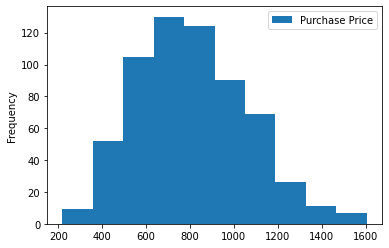

In [ ]:
job_purchase.plot(kind='hist')

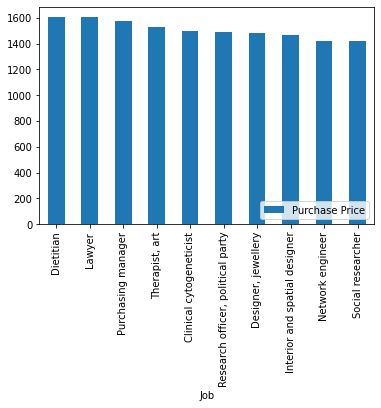

In [ ]:
#Plotting the top 10 jobs with the highest purchase price in bar chart
job_purchase.head(10).plot(kind='bar')
plt.legend(loc='lower right')
plt.show()